In [1]:
import NumPy_OneTickQuery as otq
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Choose the style of plots
plt.style.use('ggplot')

In [3]:
# Call the query
result = otq.run_query(["-otq_file C:/OMD/client_data/otqs/vwap.otq -otq_params BucketIntSec=600"])

In [20]:
# Put values in numpy array
vwap = result[0][1][1][1]
volume = result[0][1][2][1]
ts = result[0][1][0][1]

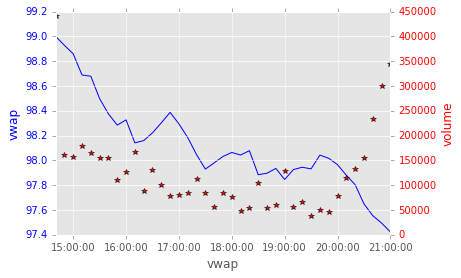

In [77]:
# Plot line and bars on one graph
#plt.figure()
#plt.plot(ts,vwap)
#plt.plot(ts,volume)
#plt.show()

fig, ax1 = plt.subplots()
ax1.plot(ts, vwap, 'b-')
ax1.set_xlabel('vwap')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('vwap', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(ts,volume, 'r*')
ax2.set_ylabel('volume', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [59]:
# Put output of the query into the pandas Data Frame
df = pd.DataFrame({'vwap':result[0][1][1][1], 'avg_price':result[0][1][3][1], 
                   'ann_vol':result[0][1][4][1], 'volume':result[0][1][2][1]}, 
                  index=result[0][1][0][1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D33D518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D26A8D0>], dtype=object)

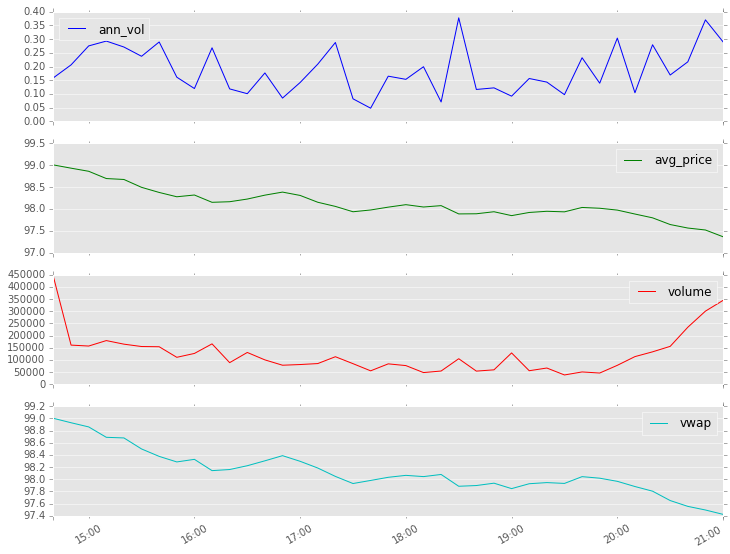

In [82]:
df.plot(subplots=True, figsize=(12,10))

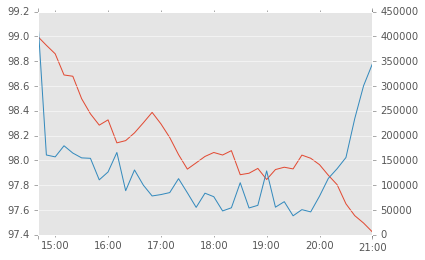

In [56]:
df.vwap.plot()
df.volume.plot(secondary_y=True)

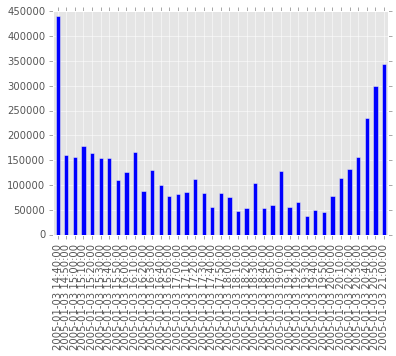

In [91]:
prices = df[['vwap','avg_price','volume']]
plot1 = prices['volume'].plot(kind='bar')

In [103]:
plot2 = prices.plot(ax=plot1)

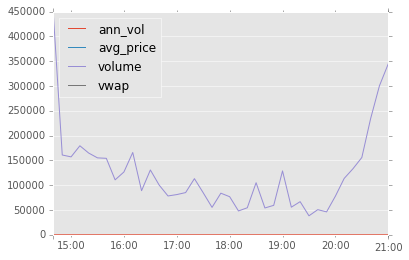

In [105]:
# Use matplotlib methods to draw graphs
df.plot()
#df['vwap'].plot(secondary_y=True, style='g')

One can use pandas Series to extract just one set of values

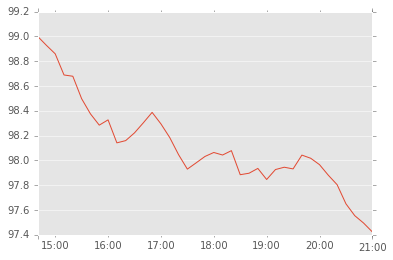

In [55]:
ser1 = pd.Series(result[0][1][1][1], index=result[0][1][0][1])
ser1.plot()

Delta Hedge example

In [65]:
dh_res = otq.run_query(["-otq_file C:\CloudMail\queries\DeltaHedge\DH_Trade_BS.otq::DH_test -context MORNINGSTAR -s 20110103093000 -e 20110103160000"])
dh_res

[('MORNINGSTAR::AAPL.126.1',
  [('Time', array(['2011-01-03T09:50:00.000000-0500',
           '2011-01-03T10:00:00.000000-0500',
           '2011-01-03T10:10:00.000000-0500',
           '2011-01-03T10:20:00.000000-0500',
           '2011-01-03T10:30:00.000000-0500',
           '2011-01-03T10:40:00.000000-0500',
           '2011-01-03T10:50:00.000000-0500',
           '2011-01-03T11:00:00.000000-0500',
           '2011-01-03T11:10:00.000000-0500',
           '2011-01-03T11:20:00.000000-0500',
           '2011-01-03T11:40:00.000000-0500',
           '2011-01-03T11:50:00.000000-0500',
           '2011-01-03T12:00:00.000000-0500',
           '2011-01-03T12:10:00.000000-0500',
           '2011-01-03T12:20:00.000000-0500',
           '2011-01-03T12:30:00.000000-0500',
           '2011-01-03T12:40:00.000000-0500',
           '2011-01-03T12:50:00.000000-0500',
           '2011-01-03T13:20:00.000000-0500',
           '2011-01-03T13:40:00.000000-0500',
           '2011-01-03T13:50:00.000000-0500

In [66]:
df_dh = pd.DataFrame({'price':dh_res[1][1][3][1],'opt_price':dh_res[1][1][2][1]}, dh_res[1][1][0][1])

In [67]:
df_dh

,opt_price,price
2011-01-03 14:50:00,2.61,327.8100
2011-01-03 15:00:00,2.47,327.4700
2011-01-03 15:10:00,2.55,328.3000
2011-01-03 15:20:00,2.82,329.4500
2011-01-03 15:30:00,2.69,329.0900
2011-01-03 15:40:00,2.81,329.5300
2011-01-03 15:50:00,2.89,329.8600
2011-01-03 16:00:00,2.80,329.9100
2011-01-03 16:10:00,2.73,329.5600
2011-01-03 16:20:00,2.70,329.6599


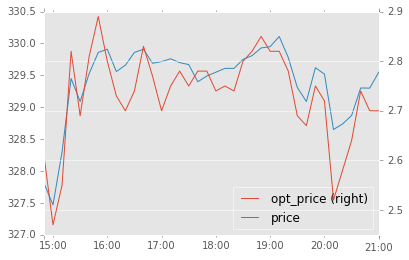

In [70]:
df_dh.plot(grid=False,secondary_y=['opt_price'])